In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [2]:
# AtLAST
zmin = 1
zmax = 5

Omega_field = 7500 #deg^2

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

Pei = 5.6e4 #Jy / sr
Lambda = 0.01 # 1 / Mpc, usual cut for HI

In [3]:
IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f.npy'%(zmin, zmax, Lambda)
print(IHi_kappa_fname)
IHi_kappa = np.load(IHi_kappa_fname)

/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_1.00000_zmax_5.00000_Lambda_0.01000.npy


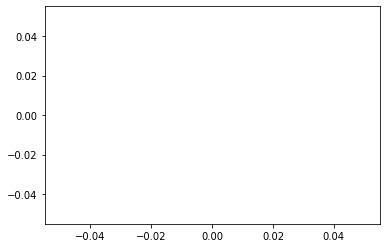

In [4]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11"
})

/tmp/ipykernel_31013/3926390249.py:27: UserWarning: Casting input data from float128 to float64 for imshow.
  plt.savefig('figures/002.007.IHikappa-AtLAST.pdf', bbox_inches = 'tight')


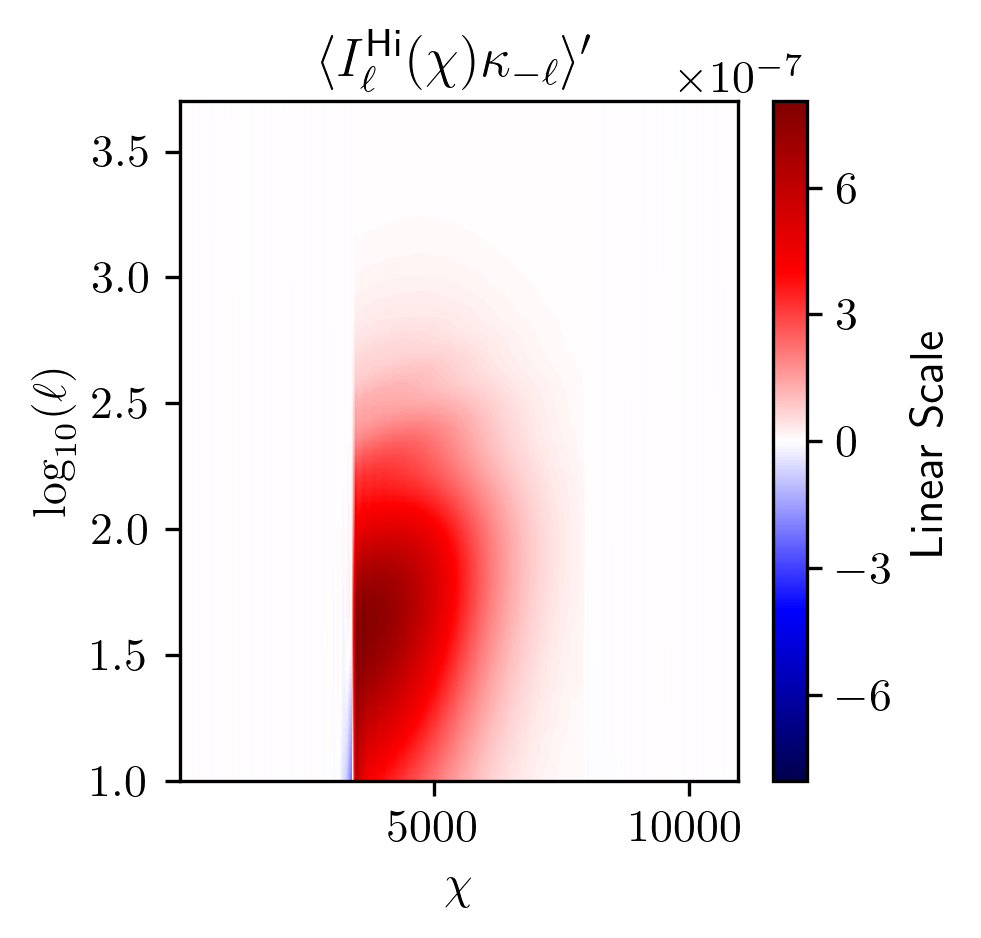

In [6]:
vminmax = np.max(np.abs(IHi_kappa))
plt.figure(figsize=(3,3), dpi=300, facecolor='w',)
 
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

# plot data
im = plt.imshow(IHi_kappa, 
           origin='lower',
          cmap = 'seismic',
          vmin = -vminmax,
          vmax =  vminmax,
           aspect = 'auto',
          extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

cbar = plt.colorbar(im, ticks=[-6e-7, -3e-7,0,3e-7,6e-7])
cbar.ax.set_ylabel('Linear Scale')


# set bounds
plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

plt.savefig('figures/002.007.IHikappa-AtLAST.pdf', bbox_inches = 'tight')

[2.43598700e-08 1.39936799e-07 8.03875709e-07]


/tmp/ipykernel_31013/3203170610.py:44: UserWarning: Casting input data from float128 to float64 for imshow.
  plt.savefig('figures/002.007.IHikappa_symlog-AtLAST.pdf', bbox_inches='tight')
/tmp/ipykernel_31013/3203170610.py:44: UserWarning: Casting input data from float128 to float64 for imshow.
  plt.savefig('figures/002.007.IHikappa_symlog-AtLAST.pdf', bbox_inches='tight')
/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


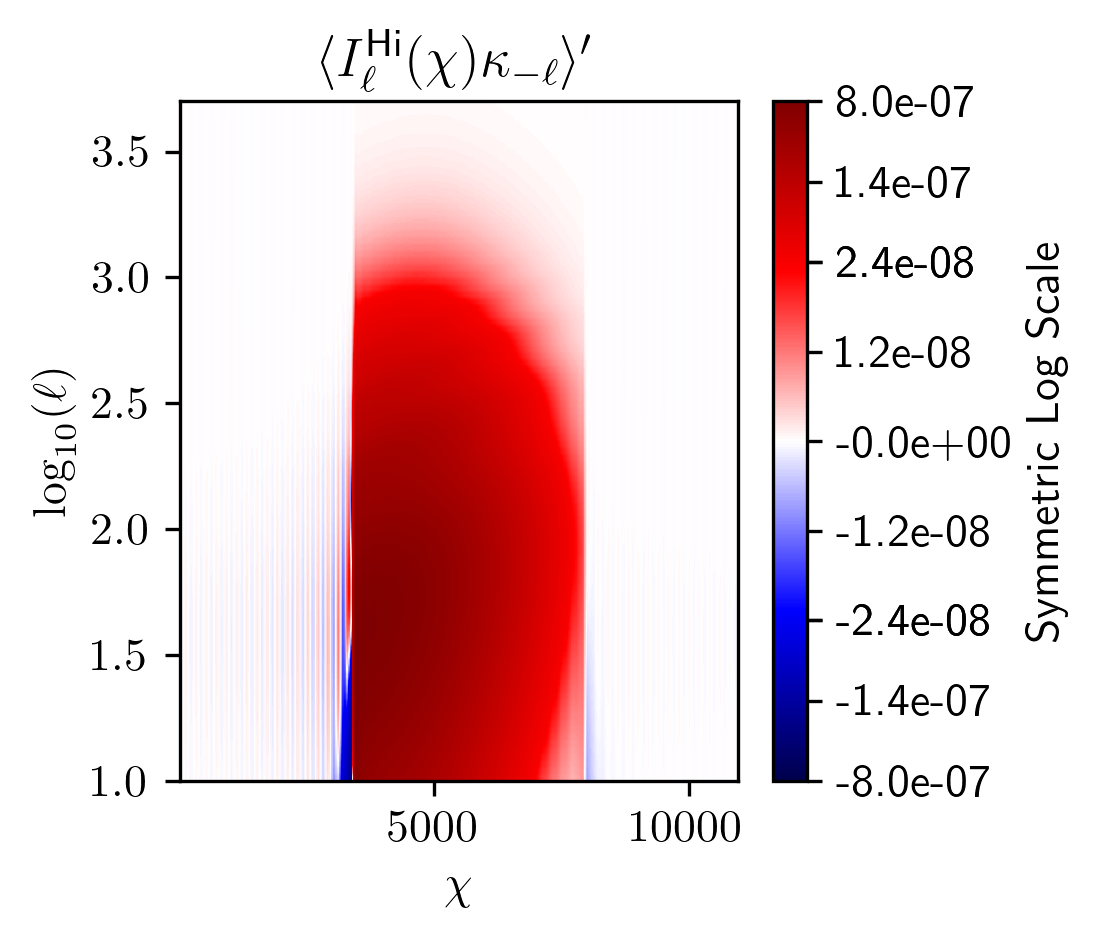

In [7]:
import matplotlib.colors as colors
import numpy as np

vminmax = np.max(np.abs(IHi_kappa))
plt.figure(figsize=(3,3), dpi=300, facecolor='w',)
    
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

lin_factor = 33
linthresh = vminmax/lin_factor
norm = colors.SymLogNorm(linthresh=linthresh, 
                         linscale = np.log10(lin_factor),
                         vmin=-vminmax, 
                         vmax=vminmax, 
                         base=10)

# plot data
im = plt.imshow(IHi_kappa, 
                origin='lower',
                cmap='seismic',
                norm=norm,
                aspect='auto',
                extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

tick_locations = np.logspace(np.log10(linthresh), np.log10(vminmax), 3)
print(tick_locations)
tick_locations = np.concatenate((np.linspace(0, linthresh, 3), tick_locations))
tick_locations = np.unique(np.concatenate((-tick_locations, tick_locations)))

cbar = plt.colorbar(im, ticks=tick_locations)
cbar.ax.minorticks_off()
cbar.ax.set_yticklabels([f'{x:.1e}' for x in tick_locations])
cbar.ax.set_ylabel('Symmetric Log Scale')



# set bounds
plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\log_{10}(\ell)$")

plt.savefig('figures/002.007.IHikappa_symlog-AtLAST.pdf', bbox_inches='tight')